In [1]:
import cv2
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt

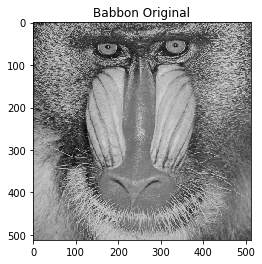

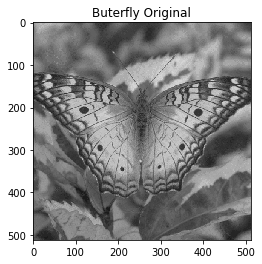

In [2]:
# Load some images (all the examples will use the baboon image)
img = cv2.imread("baboon.png")
plt.imshow(img)
plt.title("Babbon Original")
plt.show()

# Use the butterfly image for the last example
img2 = cv2.imread("butterfly.png")
plt.imshow(img2)
plt.title("Buterfly Original")
plt.show()

# 1.1 Ajuste de Brilho

Aplicar a correção gama para ajustar o brilho de uma imagem monocromática A de entrada e gerar uma imagem monocromática B de saı́da. A transformação pode ser realizada (a) convertendo-se as intensidades dos pixels para o intervalo de [0, 255] para [0, 1], (b) aplicando-se a equação $$B = A^{(1/y)}$$ e (c) convertendo-se de volta os valores resultantes para o intervalo [0, 255].

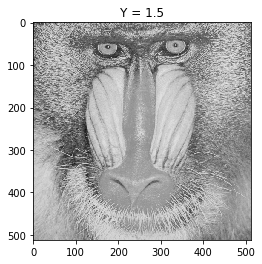

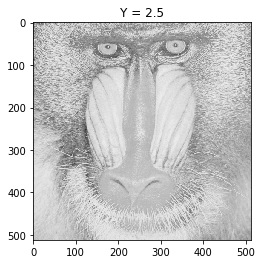

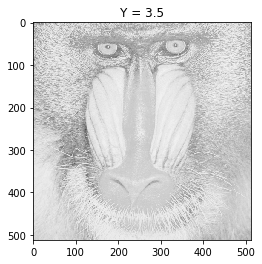

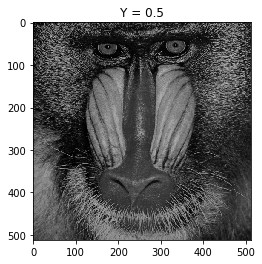

In [3]:
# Exercise 1.1

def bright_adjustment(img, factor):
    A = ((img / 255) ** (1/factor)) * 255
    return A.astype(int)

plt.imshow(bright_adjustment(img, 1.5))
plt.title("Y = 1.5")
plt.show()

plt.imshow(bright_adjustment(img, 2.5))
plt.title("Y = 2.5")
plt.show()

plt.imshow(bright_adjustment(img, 3.5))
plt.title("Y = 3.5")
plt.show()

plt.imshow(bright_adjustment(img, 0.5))
plt.title("Y = 0.5")
plt.show()

# 1.2 Plano de bits

Extrair os planos de bits de uma imagem monocromática. Os nı́veis de cinza de uma imagem monocromática com m bits podem ser representados na forma de um polinômio de base 2:

$$a_{m-1} 2^{m-1} + a_{m-2} 2^{m-2} + ... + a_{0} 2^{0}$$

O plano de bits de ordem 0 é formado pelos coeficientes a 0 de cada pixel, enquanto o plano
de bits de ordem m − 1 é formado pelos coeficientes a m−1 .

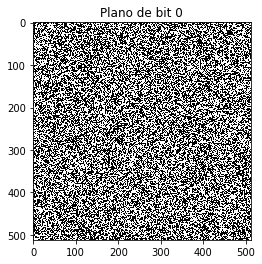

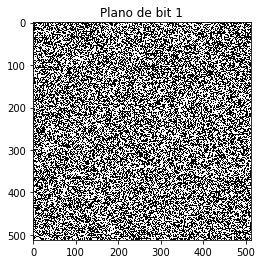

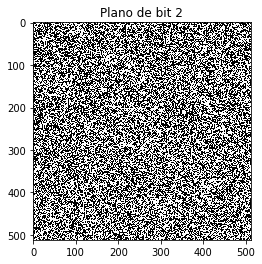

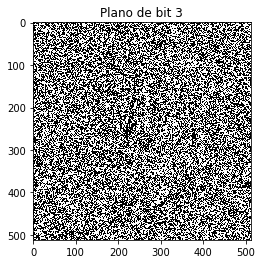

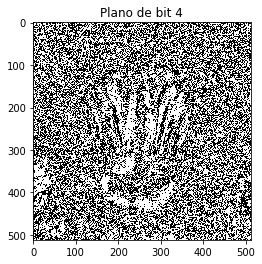

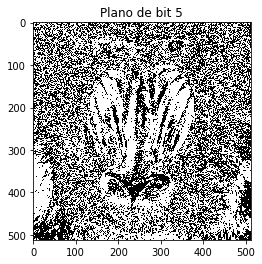

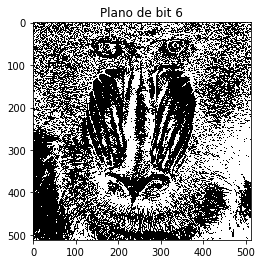

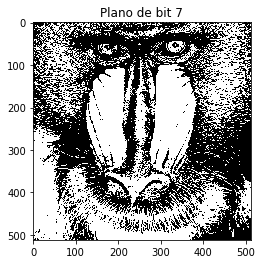

In [4]:
# Exercise 1.2
def bit_plane(img, plane):
    mask = img >> plane & 1
    return np.where(mask, 255, 0)

# Test all the 8 planes
for i in range(8):
    plt.imshow(bit_plane(img, i))
    plt.title("Plano de bit {}".format(i))
    plt.show()

# 1.3 Mosaico

Construir um mosaico de 4 × 4 blocos a partir de uma imagem monocromática. A disposição dos blocos deve seguir a numeração mostrada na figura (c).
$$
\begin{bmatrix}
    6 & 11 & 13 & 3 \\
    8 & 16 & 1 & 9 \\
    12 & 14 & 2 & 7 \\
    4 & 15 & 10 & 5
\end{bmatrix}
$$

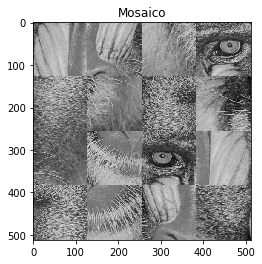

In [5]:
# Exercise 1.3

def mosaic(img, pattern):
    dh = img.shape[0] // pattern.shape[0]
    dw = img.shape[1] // pattern.shape[1]
    pattern = pattern.reshape(-1)
    
    lines = []
    res = [img[i // 4 * dh : (i//4 + 1) * dh, i % 4 * dw : (i%4 + 1) * dw] for i in pattern]
    A = np.array(res)
    lines = [np.hstack(A[i*4 : (i + 1)*4]) for i in range(len(res) // 4)]
    A = np.vstack(np.array(lines))
    return A

A = mosaic(img, np.array([6,11,13,3,8,16,1,9,12,14,2,7,4,15,10,5]).reshape((4,4)) - 1)

plt.imshow(A)
plt.title("Mosaico")
plt.show()

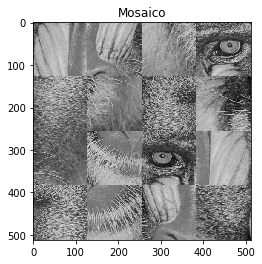

In [6]:
# Another way of doing exercise 1.3 without using fors

def mosaic_2(img, p):
    dh = img.shape[0] // p.shape[0]
    dw = img.shape[1] // p.shape[1]
    # divide the image in 4x4 smaller images
    A = img.reshape((p.shape[0], dh, p.shape[1], dw, 3))
    A = A.swapaxes(1,2)
    # Example: 16x128x128x3 (16 tiles of 128x128)
    A = A.reshape((p.shape[0] * p.shape[1], dh, dw, 3))
    # Filter using p (pattern) as mask
    return np.hstack(np.hstack(A[p]))

A = mosaic_2(img, np.array([6,11,13,3,8,16,1,9,12,14,2,7,4,15,10,5]).reshape((4,4)) - 1)

plt.imshow(A)
plt.title("Mosaico")
plt.show()

# 1.4 Combinação de images

Combinar duas imagens monocromáticas de mesmo tamanho por meio da média ponderada de seus nı́veis de cinza.

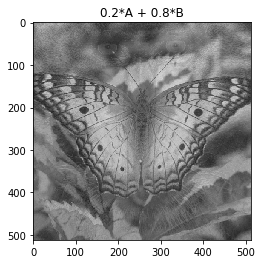

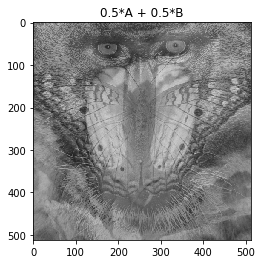

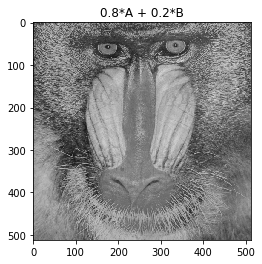

In [7]:
def image_combination(img1, s1, img2, s2):
    return (img1*s1 + img2*s2).astype(int)
    

plt.imshow(image_combination(img, 0.2, img2, 0.8))
plt.title("0.2*A + 0.8*B")
plt.show()

plt.imshow(image_combination(img, 0.5, img2, 0.5))
plt.title("0.5*A + 0.5*B")
plt.show()

plt.imshow(image_combination(img, 0.8, img2, 0.2))
plt.title("0.8*A + 0.2*B")
plt.show()